I hear emergency vehicles drive by every night, so I decided to use a data set from the City of Pittsburgh showing Fire Incidents in the city of Pittsburgh. The less fire calls they have, the less noise and therefore a better neighborhood.

In [11]:
import pandas as pd
import geopandas
import numpy as np

FireIncidents = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")

Let's Look at our data.

In [ ]:
FireIncidents.head()

Thats A bit hard to read. Lets group it by

In [ ]:
FireIncidents.groupby('neighborhood').count()

In [ ]:
IncidentCount = FireIncidents.groupby('neighborhood')['call_no'].count().sort_values(ascending = True)

print(IncidentCount)

In [ ]:
IncidentCount.plot.bar()

In [ ]:
MinFires = IncidentCount.min()
MaxFires = IncidentCount.max()

NormalizedFires = 1- (IncidentCount - MinFires) / (MaxFires - MinFires)

In [ ]:
NormalizedFires.head()

In [ ]:
print(NormalizedFires)

With the nicer weather coming around, I felt the urge to get more physical activity, and I recently discovered that playgrounds are an excelent and unique way to get exercise. A neighborhood with more playgrounds will be a healthier and therefore higher quality neighborhood.

pgData = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b") # read in the playgrounds data
pgData.head()

Not super useful just yet, lets use count() to see how many playgrounds are in each neighborhood

In [21]:
pgCount = pgData.groupby('neighborhood').count()['id']
pgCount = pgCount.sort_values( ascending=False )
pgCount.head()

neighborhood
Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
Name: id, dtype: int64

Now we can merge this sorted data with a shapefile to show the concentration of playgrounds in Pittsburgh

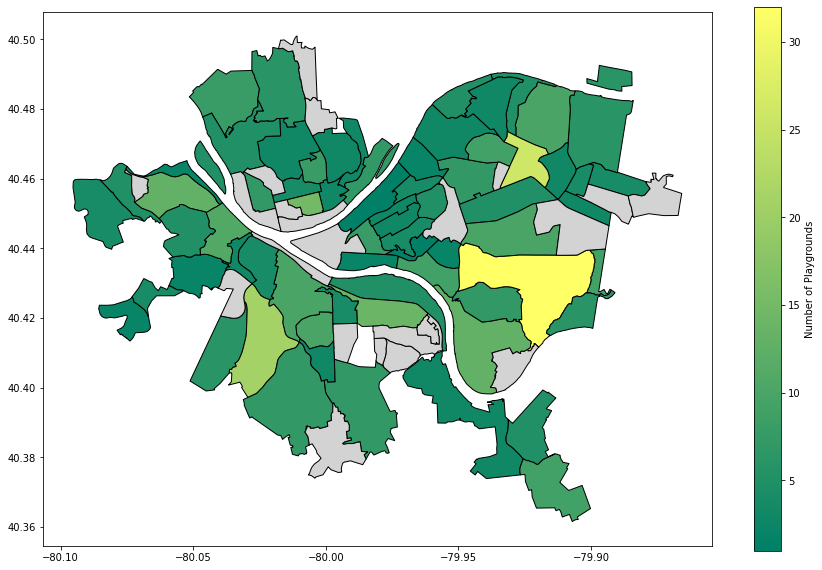

In [22]:
neighborhoods = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip") # read in the shapefile
pg_map = neighborhoods.merge(pgCount, how='left', left_on='hood', right_on='neighborhood')
pg_map.plot(column='id', # set the data to be used for coloring
               cmap='summer',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

As you can see, the bright yellow Squirrel Hill South has the most playgrounds at 32, with East Liberty coming in 2nd with 26 playgrounds, and Beechview not far behind with 21 playgrounds

In [25]:
pgMin = pgCount.min()
pgMax = pgCount.max()

pgScores = (pgCount) / (pgMax)
pgScores

neighborhood
Squirrel Hill South         1.00000
East Liberty                0.81250
Beechview                   0.65625
Allegheny Center            0.46875
South Side Slopes           0.43750
Hazelwood                   0.40625
Sheraden                    0.40625
Elliott                     0.34375
Beltzhoover                 0.31250
Highland Park               0.31250
Mount Washington            0.31250
Squirrel Hill North         0.31250
Garfield                    0.28125
Regent Square               0.28125
South Oakland               0.28125
Lincoln Place               0.28125
Brighton Heights            0.25000
Crawford-Roberts            0.25000
Fineview                    0.25000
Troy Hill                   0.21875
Bloomfield                  0.21875
Brookline                   0.21875
Carrick                     0.21875
Greenfield                  0.21875
Manchester                  0.21875
Lincoln-Lemington-Belmar    0.18750
Banksville                  0.18750
Perry North    